## Plotting

One of the most powerful ways to understand your data is through visualization. Plots can communicate what's going on in a dataset very efficiently. 

In Python, the most convenient way to produce plots is through the `matplotlib` package. That package has "subpackage" called `pyplot`. You will always see it renamed as `plt`. Importing this way makes certain plotting functions easier to use.

At minimum, we call `plt.plot` and give it some numbers, then `plt.show()` to actually show the plot. Here, `plt.ylabel` is optional, and allows us to label the y-axis:

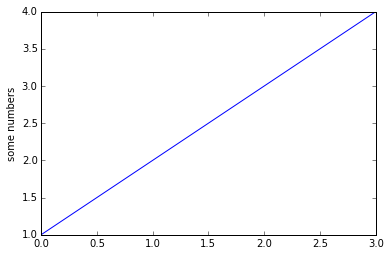

In [30]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

Notice that the plot opens in a new window. This is nice when you want to interact with it (you can zoom, pan, etc.) but it is not very clean if you want to make a bunch of plots. It would be better to have them appear between our cells of code. Don't fret! Jupyter notebook to the rescue. 

We use one of the "magic commands" <http://ipython.readthedocs.org/en/stable/interactive/magics.html> to tell it to display matplotblib plots in-line instead. 

In [31]:
%matplotlib inline #we just need to do this once

UsageError: unrecognized arguments: #we just need to do this once

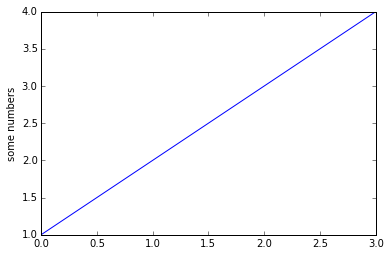

In [32]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

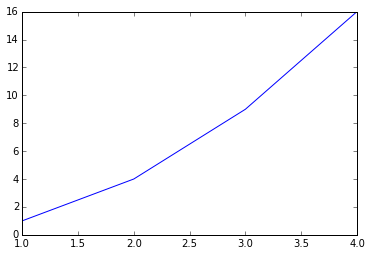

In [33]:
#plt.show is optional if you have inline plots
z = plt.plot([1, 2, 3, 4],
             [1, 4, 9, 16])


### `plt.plot` arguments

* If you give `plt.plot` 1 argument, it will understand that as your y values, and assume that your x vales are 1,2,3... and so on. 

* If you give it 2 arguments, then it interprets the first as the x values, and the second as the y values. 

    * Your x and y values should be either a list or numbers, or (better yet) a numpy array

* If you give it a 3rd argument, that specifies the color and type of marker you want to use. You specify this with a color code and a shape code:      

  - The first character specifies the color ('r' is for red, 'b' is for blue, etc.)
  - The second character specifies the marker type ('-' is for line, 'o' is for circle, 'v' is for triangle...)

    * You can find all the abbreviations in the documentation: <http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot> 


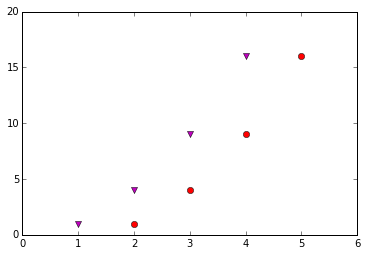

In [34]:
plt.plot([1,2,3,4], [1,4,9,16], 'mv')

plt.plot([2,3,4,5], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])#the numbers correspond to [xmin,xmax,ymin,ymax]
plt.show()

What if we want bigger markers? There are a lot of options for `plt.plot`:

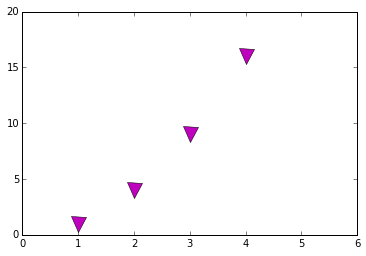

In [35]:
plt.plot([1,2,3,4], [1,4,9,16], 'mv', markersize=15)
plt.axis([0,6,0,20])

We can plot multiple sets of data within 1 line of code by specifying sets of x and y coordinates

[ 1  2  3  4  5  6  7  8  9 10]
[  1   4   9  16  25  36  49  64  81 100]
[   1    8   27   64  125  216  343  512  729 1000]


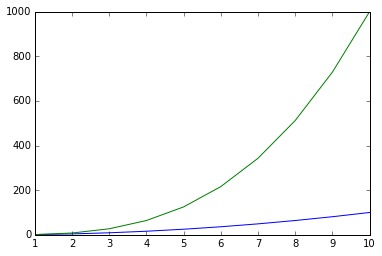

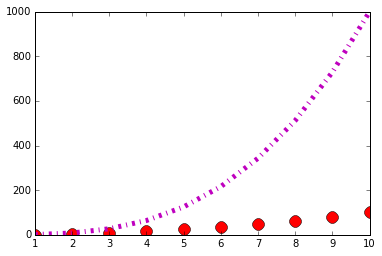

In [56]:
x1 = np.arange(1,11)
x2 = x1
y1 = []
y2 = []

y1 = x1**2 
y2 = x1**3  
    
print x1
print y1
print y2

plt.plot(x1,y1,x2,y2) #x1 goes with y1, then x2 goes with y2
plt.show()

#it also works with the markers
plt.plot(x1,y1,'ro',x2,y2,'m-.',markersize=12, linewidth=5)
plt.show()

### Layers

Every time you call `plt.plot`, think about it as putting a layer you your plot. The order that you draw things will determine what is overlapping. So, if you want to have a line plot that also has dots on it, we want to draw the line first, then the dots: 

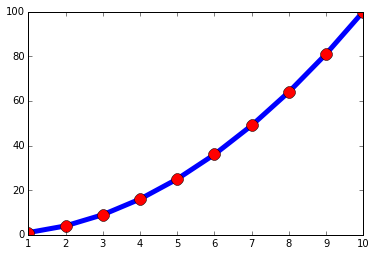

In [57]:
plt.plot(x1,y1,linewidth=5) #creates a line by default
plt.plot(x1,y1,'ro',markersize=12)
plt.show()

Below, we do the same exact thing, but swap the order of statements. Notice that the dots are now underneath the line: 

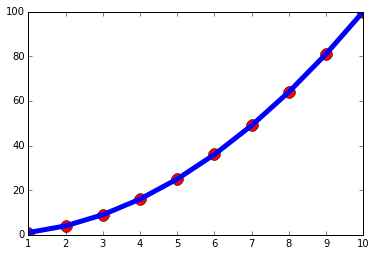

In [58]:
plt.plot(x1,y1,'ro',markersize=12) #draw markers
plt.plot(x1,y1,linewidth=5) #...then line
plt.show()

** Now it's your turn! Try to make a plot with the same data as above, but with both dots and lines. For `y`, use blue dots and a thick green, solid line. For `y2` use magenta triangles and a thin dashed cyan line. Make sure the triangles are larger than the dots. ** 



### Customizing plots with `setp`

Sometimes you want to change the plot after you already call plt.plot(). We can do this if we first save the plot. Notice in the example below, we call `plt.plot`, but we assign it to the variable called `lines`. Later we can use the `plt.setp` function (think: "set properties" <http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.setp>) to change the different properties of that plot

[None, None]

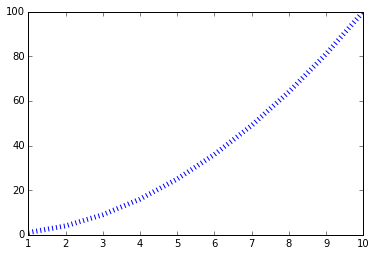

In [39]:
lines = plt.plot(x1,y1) #notice we save the result
plt.setp(lines,linestyle='dotted', linewidth=5) #now we change the plot, and save the result 

To see what properties you can change, you can just use `setp` with no arguments. Some of the properties may not apply to the type of plot you have, though. 

In [40]:
plt.setp(lines)

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque)         
  animated: [True | False]         
  antialiased or aa: [True | False]         
  axes: an :class:`~matplotlib.axes.Axes` instance         
  clip_box: a :class:`matplotlib.transforms.Bbox` instance         
  clip_on: [True | False]         
  clip_path: [ (:class:`~matplotlib.path.Path`,         :class:`~matplotlib.transforms.Transform`) |         :class:`~matplotlib.patches.Patch` | None ]         
  color or c: any matplotlib color         
  contains: a callable function         
  dash_capstyle: ['butt' | 'round' | 'projecting']         
  dash_joinstyle: ['miter' | 'round' | 'bevel']         
  dashes: sequence of on/off ink in points         
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' |                   'steps-post']         
  figure: a :class:`matplotlib.figure.Figure` instance         
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none']         
  gid: an 

In [41]:
# you can also just ask about a particular property to see what acceptable values are
plt.setp(lines,'linestyle')

  linestyle: [``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` |                   ``' '`` | ``''``]


### Multiple Plots

Often we want multiple plots on 1 figure. We can do this pretty easily using the `subplot` function. It takes a set of 3 numbers, which specify the row, column, and figure number. Each time you call it, you're saying "OK, I have a figure with this many rows and this many columns, and I am about to plot the nth figure". 

The first thing you have to do is call the `figure` function to create an overall figure. Then you call each subplot after that. If you only make 1 plot, then `plt.figure()` gets called in the background for you. 

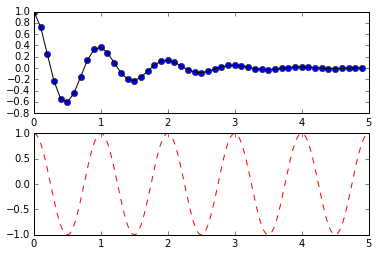

In [42]:
import numpy as np
import matplotlib.pyplot as plt

#create our x data
x1 = np.arange(0.0, 5.0, 0.1)
x2 = np.arange(0.0, 5.0, 0.02)

#create our y data
y1 = np.exp(-x1) * np.cos(2*np.pi*x1) #do some fancy math
y2 = np.cos(2*np.pi*x2) #do some other fancy math

plt.figure() #make a figure

#first subplot. 2 rows, 1 column, 1st plot
plt.subplot(2,1,1) #you don't need the commas if you don't want, can say "211"
plt.plot(x1,y1, 'bo', x1, y1, 'k')

#second subplot 2 rows, 1 column, 2nd plot
plt.subplot(2,1,2) #can also do without commas, "212"
plt.plot(x2, y2, 'r--')
plt.show()

## Different Types of Plots (Bar, scatter, heatmap)

Matplotlib can go way beyond simple line and scatter plots. It can do just about everything (see the gallery [here](http://matplotlib.org/gallery.html)). Below are just a few common examples. 


### Bar plots

You can create a bar plot using `plt.bar` and giving the x and y coordinates, just like a normal plot. 



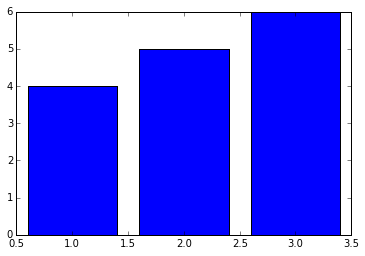

In [43]:
#here's a bar plot
plt.bar([1,2,3],[4,5,6],align='center') #align='center' is optional. Centers bars over x values
plt.show()

Notice this example is a little ugly, because the bars go all the way to the edge or the plot area. We want it centered a little nicer. We can change the range of the axes using the `axis` function. We just give it a list of 4 numbers: [xmin,xmax, ymin, and ymax]

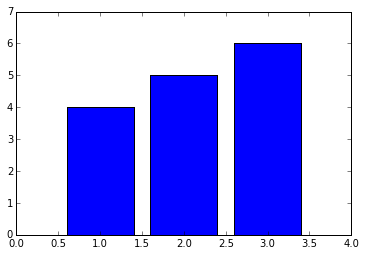

In [44]:
#same plot, with a little more room
plt.bar([1,2,3],[4,5,6],align='center')
plt.axis([0,4,0,7])
plt.show()

Notice the x-axis looks funny for a bar plot too. We really only want a marker (called a "tick mark") wherever a bar is. We can change that with `plt.xticks` and give it an array of numbers where you want the markers to be. We can optionally give a set of labels as a second argument. 

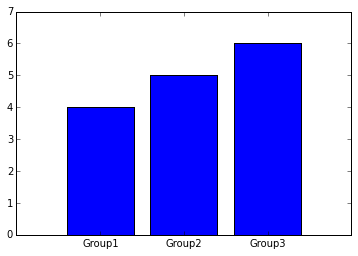

In [45]:
#adding the tick marks
plt.bar([1,2,3],[4,5,6],align='center')
plt.axis([0,4,0,7])
plt.xticks([1,2,3],['Group1','Group2','Group3']) #only put a tick mark centered under each bar
plt.show()

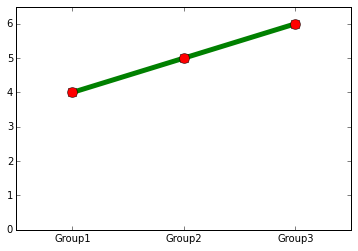

In [46]:
#here's the same data as a line and scatter plot
plt.plot([1,2,3],[4,5,6],linewidth=5,color='green')
plt.plot([1,2,3],[4,5,6],'ro',markersize=10)
plt.axis([.5,3.5,0,6.5])
plt.xticks([1,2,3],['Group1','Group2','Group3'])
plt.show()

### Scatter plots

We can make scatter plots using `plt.scatter`. The most relevant thing we want to specify is the size, color, and shape of the marker. First, a basic example:

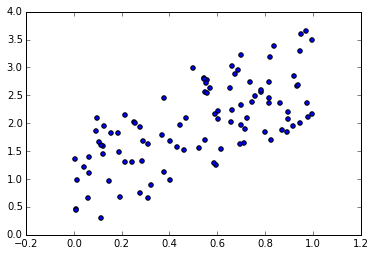

In [47]:
#make some fake data
from numpy.random import rand

x = rand(100)
y = x*2 + rand(100)*2

plt.scatter(x,y) #by default, little blue dots
plt.show()

Often you want to change the size, shape, and color of your dots, especially if you want mulitple groups on 1 plot. 

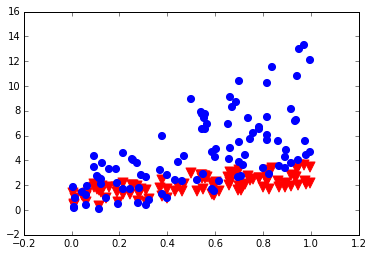

In [48]:
#s determines the size, which corresponds to the area of the dot
plt.scatter(x,y,color='red', s=100, marker='v') #big red triangles
plt.scatter(x,y**2,color='blue', s=50, marker='o') #smaller blue circles
plt.show()


Another nice thing to do is to make them partially transparent. You can do this with any type of plot (not just scatter plots) using the `alpha` argument. You specify a number between 0 and 1 to specify how opaque it is. 0 means it's totally invisible, 1 means that it's not transparent at all. 

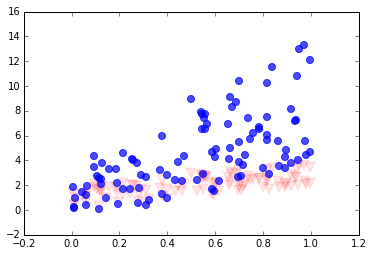

In [49]:
plt.scatter(x,y,color='red', s=100, marker='v',alpha=0.1)  #almost invisible
plt.scatter(x,y**2,color='blue', s=50, marker='o', alpha= 0.7) #pretty visible
plt.show()

### More specialized plots

Using the syntax above, like `plt.plot`, `plt.bar`, and `plt.scatter` works pretty well for simple plots. However, different types of plots require more specialized settings, so there is a different way of creating a plot that makes this more flexible. You will see this method in a number of the [examples](http://matplotlib.org/examples/index.html) on the matplotlib website.

Instead of doing just `plt.plot`, you want to first call `plt.subplots`, which creates 2 variables, which you want to call `fig` and `ax` (but you can call them whatever you want). `fig` refers to the figure, and `ax` refers to the actual plot (the "axis").

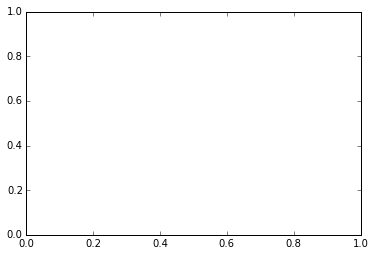

In [50]:

fig, ax = plt.subplots() #create 1 blank plot


Then you use different functions for creating specific types of plots on your axis, like `bar`. This time, you get more options for customizing. Notice that it's more flexible, but also takes more code. 

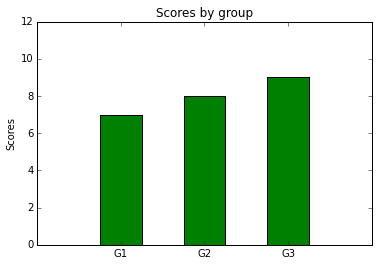

In [62]:
#make some fake data
xdata = np.arange(1,4)
ydata = np.arange(7,10)
width = 0.5 #width of the bars we want

fig, ax = plt.subplots() #create 1 blank plot
ax.bar(xdata,ydata,width,color='g',align='center') #create the bar plot
ax.axis([0,4,0,12]) #change the axis limits

#change some of the labels
ax.set_ylabel('Scores')
ax.set_title('Scores by group')
ax.set_xticks(xdata)
ax.set_xticklabels(('G1', 'G2', 'G3'))

plt.show()

### Example - Histogram

Histograms are great if you want to get a sense of how your data are distributed. We can accomplish this with `plt.hist`. 

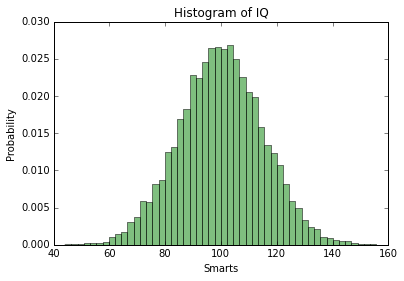

In [52]:
#create a random distribution of 10,000 numbers
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

numbins= 50 #try changing this number and see what happens!

# the histogram of the data
n, bins, patches = plt.hist(x, numbins, normed=True, facecolor='g', alpha=0.5)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.show()

### Example - Heatmap

Below is an example of a "heatmap". It is a way of showing a grid of values. The color in each square tells you how high the number is. For this type of plot, you have to do the `plt.subplots()` method that I showed above. Here's an example from the matplotlib website:

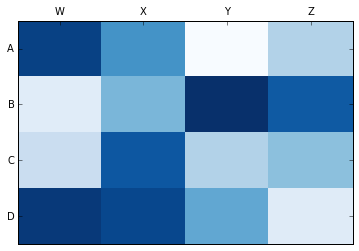

In [53]:
#fake data- 4x4 grid of random numbers
data = np.random.rand(4,4)

#labels for the rows and columns
column_labels = list('ABCD')
row_labels = list('WXYZ')

#create the plot - heatmaps are called 'pcolor'
fig, ax = plt.subplots()
heatmap = plt.pcolor(data, cmap=plt.cm.Blues) #cmap is the color pallete, here we use blues

# put the major ticks at the middle of each cell
#first we calculate where those would be, like [.5,1.5,2.5,3.5]
xtick_values = np.arange(data.shape[0])+0.5 #data.shape[0] gives us the number of rows
ytick_values = np.arange(data.shape[1])+0.5 #data.shape[1] gives us the number of colums

#here we're setting the tick marks
ax.set_xticks(xtick_values, minor=False)
ax.set_yticks(ytick_values, minor=False)

# want a more natural, table-like display
ax.invert_yaxis() #flips the y-axis to it starts at the top
ax.xaxis.tick_top() #puts x ticks at the top, instead of the bottom

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()

### Adding text to plots

We can add text to any plot using `plt.text`. We just give it an x and y coordinate. 

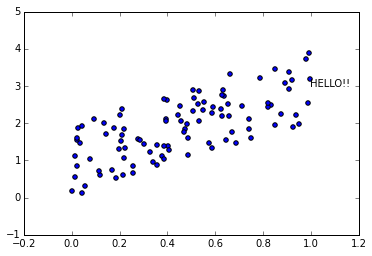

In [54]:
#make some fake data
from numpy.random import rand

x = rand(100)
y = x*2 + rand(100)*2

plt.scatter(x,y) #by default, little blue dots

plt.text(1,3,'HELLO!!') #print "HELLO!" at position 1,3

plt.show()


We can also point to a particular spot on our plot using `plt.annotate`. We specify the x,y coordinates of the place we want to point to, and the x,y coordinates of the text itself. 

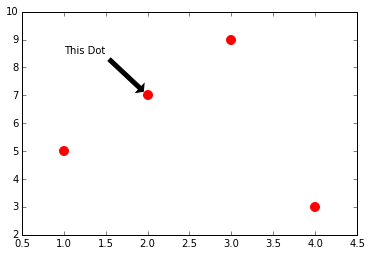

In [55]:


plt.scatter([1,2,3,4],[5,7,9,3], s=80,color='red') #create a scatterplot

#point to the dot at 2,7, with the label "This Dot"
#Put the text at 1,8.5
plt.annotate('This Dot', xy=(2, 7), xytext=(1, 8.5),
            arrowprops=dict(facecolor='black', shrink=0.10)) #arrowprops sets properties for the arrow


plt.show()

Again, this is just the tip of the iceberg. Matplotlib can do lots of stuff. The point is to just show you some of the basics. 